In [ ]:
# importando a biblioteca panda para trabalhar com dataframes
import pandas as pd

# arquivo contendo os filmes
filmes = pd.read_csv("movies.csv")

# Alterando o nome das colunas dos dados filmes
filmes.columns = ["filmeId", "titulo", "genero"]

# Criando o arquivo de indice para busca
filmes = filmes.set_index("filmeId")

# mostrando os 5 primeiros filmes
filmes.head()

,titulo,genero
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
# arquivo contendo as notas da votação dos usuarios
notas = pd.read_csv("ratings.csv")

# alterando os nomes das colunas dos dados de votação
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

# mostrando os 5 primeiras votação
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Gerarando estatísticas descritivas
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Recomendação de Filmes mais votados
 Filmes que receberam um total de votos maior.

In [ ]:
#pegando o campo filme das nota
notas["filmeId"]

0              1
1              3
2              6
3             47
4             50
           ...  
100831    166534
100832    168248
100833    168250
100834    168252
100835    170875
Name: filmeId, Length: 100836, dtype: int64

In [ ]:
# contando quantas usuarios deram as notas para os filmes - counts - conta a frequencia
notas['filmeId'].value_counts()

filmeId
356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: count, Length: 9724, dtype: int64

In [ ]:
# total de votos - ja posso abrir essas recomendações logo no inicio do login do usuario no stream
total_de_votos = notas['filmeId'].value_counts()
total_de_votos.head(10)

filmeId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: count, dtype: int64

In [ ]:
# vendo qual o filme recomendado
filmes.loc[356]

titulo         Forrest Gump (1994)
genero    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [ ]:
# adicionando uma coluna total de votos (merge da serie e do dataframe)
filmes["total_de_votos"] = total_de_votos
filmes.head(10)

,titulo,genero,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0
6,Heat (1995),Action|Crime|Thriller,102.0
7,Sabrina (1995),Comedy|Romance,54.0
8,Tom and Huck (1995),Adventure|Children,8.0
9,Sudden Death (1995),Action,16.0


In [ ]:
# pega os filmes ordenado pelo total de votos em ordem decrescente
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,genero,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


# Recomendação com nota media alta
Filmes melhores avaliados e mais votados

In [ ]:
# mostrando os 5 primeiras notas (votação)
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# calculando a media das notas (votação) dos filmes
notas.groupby("filmeId").mean() ["nota"]

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [ ]:
# nota medias dos filmes (agrupando pelo filmeId)
notas_medias = notas.groupby("filmeId").mean() ["nota"]
notas_medias.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [ ]:
# colocando as notas medias no dataframe do filmes
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


In [ ]:
# filmes com nota media mais alta (mas nesse caso não é o melhor filme)
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [ ]:
# filmes que tiraram a nota mais alta (media)
filmes.query("total_de_votos >= 50").sort_values("nota_media", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [ ]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


# Recomendação de filmes que eu assiti

Similares - filmes do mesmo genero

In [ ]:
eu_assisti = [1,21,19,10,11,7,2]
filmes.loc[eu_assisti]

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
# filmes que são do genero do ultimo filme que eu assisti
filmes.query("genero=='Adventure|Children|Fantasy'").head(5)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,34.0,3.235294
126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy,7.0,2.000000
1009,Escape to Witch Mountain (1975),Adventure|Children|Fantasy,9.0,3.055556
2043,Darby O'Gill and the Little People (1959),Adventure|Children|Fantasy,4.0,2.750000


In [ ]:
# filmes que são do genero do ultimo filme que eu assisti (mas trazendo filmes com pouca popularidade)
filmes.query("genero=='Adventure|Children|Fantasy'").sort_values("nota_media", ascending = False).head(10)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
126142,The Cave of the Golden Rose (1991),Adventure|Children|Fantasy,1.0,4.000000
80748,Alice in Wonderland (1933),Adventure|Children|Fantasy,1.0,4.000000
56915,"Water Horse: Legend of the Deep, The (2007)",Adventure|Children|Fantasy,1.0,4.000000
82169,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy,7.0,3.857143
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43.0,3.581395
59501,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,12.0,3.541667
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("genero=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.sort_values("nota_media", ascending = False).head(5)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
# recomendar filme do genero do ultimo filme que assiti, mais excluir os filmes que ja assitir
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("genero=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(5)

,titulo,genero,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


# Usuarios com gosto similares

Collaborative filtering x Content based filtering


Definindo a distância euclidiana entre usuário e filme

- joão deu a nota 4 no filme toy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota filme 3.5 no filme toy story


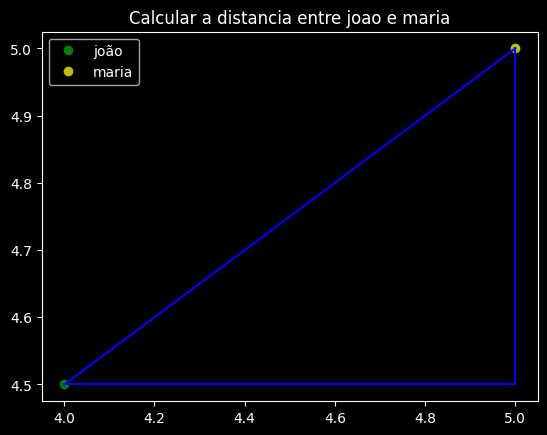

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import style

style.use('dark_background')

# joao [ 4, 4.5]
# maria [ 5, 5]

plt.plot (4, 4.5, "go" )
plt.plot (5, 5, "yo" )

plt.legend(["joão", "maria"])
plt.title("Calcular a distancia entre joao e maria")

plt.plot([4, 5], [4.5 , 4.5 ], linestyle = "-", color ="b" )
plt.plot([4, 5], [4.5 , 5 ], linestyle = "-", color ="b" )
plt.plot([5, 5], [4.5 , 5 ], linestyle = "-", color ="b" )

# triangulo retangulo = calcula a distancia entre joao e maria
# calculo da hipotenusa - pitagoras


In [ ]:
import numpy as np #biblioteca para operações em matrizes

joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao-maria

array([-1. , -0.5])

In [ ]:
from math import sqrt

def pitagoras(a,b):
    (delta_x, delta_y ) = a - b
    return sqrt(delta_x * delta_x + delta_y * delta_y) # hipotenusa

# distancia entre joao e maria
pitagoras(joao, maria)

1.118033988749895

In [ ]:
# o numpy ja possui uma função que fac o calculo da distancia
def pitagoras( a, b ):
    return np.linalg.norm(a - b)

# distancia entre joao e maria - algerbra linear
pitagoras(joao, maria)


1.118033988749895

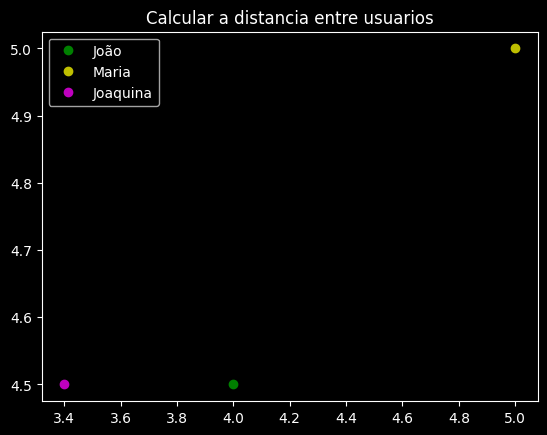

In [ ]:
# joao [ 4, 4.5]
# maria [ 5, 5]
joaquina = [3.5, 4.5]

plt.plot (4, 4.5, "go" )
plt.plot (5, 5, "yo" )
plt.plot (3.4, 4.5, "mo")

plt.legend(["João", "Maria", "Joaquina"])
plt.title("Calcular a distancia entre usuarios")

style.use('dark_background')



In [ ]:
print(pitagoras(joao, maria))

1.118033988749895


In [ ]:
joaquina = np.array([3.5, 4.5])

# a joaquina é mais parecida com o joão (distancia mais próxima)
print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

# na hora de recomendar os filmes para o joao vamos ver os filmes da joaquina


1.118033988749895
0.5


In [ ]:
# funçao para caculo da distancia entre dois usuarios
def distancia(a,b):
    return np.linalg.norm(a - b)

In [ ]:
def distancia_de_vetores(a,b):
    return np.linalg.norm(a - b)


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#extraindo as notas dos usuarios
notas.query("usuarioId == 1").head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# extraindo as notas de usuarios especificos

notas_do_usuario = notas.query("usuarioId == 1")
notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
notas_do_usuario.loc[3]

nota    4.0
Name: 3, dtype: float64

In [ ]:
def notas_do_usuario(usuario):
    notas_do_usuario = notas.query("usuarioId == %d" % usuario)
    notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
    return notas_do_usuario

In [ ]:
notas_do_usuario(1)

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [ ]:
usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)


In [ ]:
usuario1.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [ ]:
usuario4.head()

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [ ]:
# caculando a diferencia entre dois vetores
# juntando a nota do usuario da esquerda com a nota do usuario da direita (nesse caso, usuario 1 e usarioa 4)
usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita")

,nota_esquerda,nota_direita
filmeId,,
1,4.0,NaN
3,4.0,NaN
6,4.0,NaN
47,5.0,2.0
50,5.0,NaN
...,...,...
3744,4.0,NaN
3793,5.0,NaN
3809,4.0,3.0


In [ ]:
# juntando a nota do usuario da esquerda com a nota do usuario da direita
# retirando os filmes que nao tem nota no usuario da direita/esquerda

usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()


,nota_esquerda,nota_direita
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [ ]:
# difenca dos dois usuarios (distancia)
diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas["nota_esquerda"], diferencas["nota_direita"])


11.135528725660043

In [ ]:
# distancia dos dois vetores

def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  distancia =  distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_usuarios(1,4)

[1, 4, 11.135528725660043]

In [ ]:
quantidade_de_usuarios = len(notas['usuarioId'].unique())
print("Temos %d usuarios" % quantidade_de_usuarios)

Temos 610 usuarios


In [ ]:
def distancia_de_todos(voce_id):
  distancias = []
  for usuario_id in notas['usuarioId'].unique():
    informacoes = distancia_de_usuarios(voce_id, usuario_id)
    distancias.append(informacoes)
  return distancias

distancia_de_todos(1)[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [ ]:
def distancia_de_todos(voce_id):
  todos_os_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_de_usuarios(voce_id, usuario_id) for usuario_id in todos_os_usuarios]
  distancias = pd.DataFrame(distancias, columns = ["voce", "outra_pessoa", "distancia"])
  return distancias

In [ ]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="_5")

,nota_1,nota_5
filmeId,,
1,4.0,4.0
3,4.0,NaN
6,4.0,NaN
47,5.0,NaN
50,5.0,4.0
...,...,...
3744,4.0,NaN
3793,5.0,NaN
3809,4.0,NaN


In [ ]:
notas_do_usuario(1).join(notas_do_usuario(5), lsuffix="_1", rsuffix="_5").dropna()

,nota_1,nota_5
filmeId,,
1,4.0,4.0
50,5.0,4.0
110,4.0,4.0
296,3.0,5.0
316,3.0,2.0
349,4.0,3.0
367,4.0,4.0
457,5.0,4.0
527,5.0,5.0
